In [ ]:
!pip install matplotlib
!pip install unlzw
!pip install pyarc

  Created wheel for unlzw: filename=unlzw-0.1.1-cp37-cp37m-linux_x86_64.whl size=21435 sha256=034bffc88f0a707ea87956efcfae3dd0041fe2cb0c0df83f145da65cc78a1418
  Stored in directory: /root/.cache/pip/wheels/6e/36/71/0956632d0fc14c99edc168063b7ff06c3462e19855a0df36db
Successfully built unlzw
     |████████████████████████████████| 357 kB 8.3 MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=537787 sha256=64463c273ef702a7413db5cb54a26449f52ad4d6cdb098cfb057d3d93bee34a5
  Stored in directory: /root/.cache/pip/wheels/08/9f/26/09cb4efd027e46f96e0a0f33d0a74be614d3caf89c1eeb75a8
Successfully built pyfim


In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from unlzw import unlzw
import csv, re
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pyarc import TransactionDB
from pyarc.algorithms import (
    top_rules,
    createCARs,
    M1Algorithm,
    M2Algorithm
)


ModuleNotFoundError: ignored

#Data Preprocessing

In [ ]:
# Load the iris dataset
# iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
iris = pd.read_csv('drive/MyDrive/iris.data', header = None)
iris.columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]
iris.to_csv("iris.csv", index = None, header = True)
#iris = pd.read_csv('iris.csv',index= None, header = True)

#Load the waveform dataset #CART decision tree algorithm: 72% (Information from the .names file)
with open('drive/MyDrive/waveform.data.Z', 'rb') as fh:
    compressed_data = fh.read()
    uncompressed_data = unlzw(compressed_data)
data = uncompressed_data.decode('utf-8').splitlines()
with open("wave.csv", "w") as csv_file:
    writer = csv.writer(csv_file, delimiter = '\t')
    for line in data:
        writer.writerow(re.split('\s+',line))
wave = pd.read_csv('wave.csv', header = None)
wave.to_csv("wave.csv", index = None, header = True)
wave_labels = []
for i in range(21):
  wave_labels.append('x'+str(i))
wave_labels.append('class')
wave.columns=wave_labels
wave.to_csv("wave.csv", index = None, header = True)

#Load the breast cancer dataset
breastCancer = pd.read_csv("drive/MyDrive/breast-cancer.data")
breastCancer.columns=["class","age", "menopause", "tumor-size", "inv-nodes", "node-caps","deg-malig","breast","breast-quad","irradiat"]
breastCancer.to_csv("breastCancer.csv", index = None, header = True)
#wave.to_csv("breastCancer.csv", index = None, header = True)


#Load the german dataset
german = pd.read_csv('drive/MyDrive/german.data', header = None)
german.head()
german_columns=["checkAccStatus", "durationMth", "credHist", "purpose", "credAmt","savAccBond","emplySince","instRate","personalStatSex","otherDebtGuar","presResSince","prpty","age(years)","otherInstallPlans","housing","numExistCreds","job","numPplMaintain","telephone","frgnWorker","goodBad"]
german = german[0].str.split(" ", n = 20, expand = True)
german.columns = german_columns
german.to_csv("german.csv", index = None, header = True)
#german.columns = german_columns

#Load the heart dataset
heart = pd.read_csv('drive/MyDrive/heart.dat', header = None)
heart = heart[0].str.split(" ", n = 13, expand = True)
heart.columns=["age", "sex", "chest pain type", "resting blood pressure", "serum cholesterol (mg/dl)", "resting blood sugar >120mg/dl","resting electrocariographic results","maximum heart rate received","exercise induced angina", "oldpeak","slopePeak", "numMajorVessels","thal","class"]
heart_columns= ["age", "sex", "chest pain type", "resting blood pressure", "serum cholesterol (mg/dl)", "resting blood sugar >120mg/dl","resting electrocariographic results","maximum heart rate received","exercise induced angina", "oldpeak","slopePeak", "numMajorVessels","thal"]
heart.to_csv("heart.csv", index = None, header = True)

#2) Implement an algorithm of Classification based on Association rules. You can implement any algorithm in the paper, or a variant of these algorithms

In [ ]:
#TODO: split the train and test properly
data_train = pd.read_csv("iris.csv")
data_test = pd.read_csv("iris.csv")

txns_train = TransactionDB.from_DataFrame(data_train)
txns_test = TransactionDB.from_DataFrame(data_test)

# get the best association rules
rules = top_rules(txns_train.string_representation)

# convert them to class association rules
cars = createCARs(rules)

#classifier = M1Algorithm(cars, txns_train).build()
classifier = M2Algorithm(cars, txns_train).build()

iris_accuracy = classifier.test_transactions(txns_test)
print(iris_accuracy)

0.9933333333333333


In [ ]:
#pyArc on wave (runs indefinitely)
#TODO: split the train and test properly
data_train = pd.read_csv("wave.csv")
data_test = pd.read_csv("wave.csv")

txns_train = TransactionDB.from_DataFrame(data_train)
txns_test = TransactionDB.from_DataFrame(data_test)

# get the best association rules
rules = top_rules(txns_train.string_representation)

# convert them to class association rules
cars = createCARs(rules)

#classifier = M1Algorithm(cars, txns_train).build()
classifier = M2Algorithm(cars, txns_train).build()

wave_accuracy = classifier.test_transactions(txns_test)
print(wave_accuracy)


0.775438596491228


In [ ]:
#pyArc on breast cancer
#TODO: split the train and test properly


data_train = pd.read_csv("breastCancer.csv")
data_test = pd.read_csv("breastCancer.csv")

txns_train = TransactionDB.from_DataFrame(data_train)
txns_test = TransactionDB.from_DataFrame(data_test)

# get the best association rules
rules = top_rules(txns_train.string_representation)

# convert them to class association rules
cars = createCARs(rules)

#classifier = M1Algorithm(cars, txns_train).build()
classifier = M2Algorithm(cars, txns_train).build()

bc_accuracy = classifier.test_transactions(txns_test)
print(bc_accuracy)

0.775438596491228


In [ ]:
#pyArc on german (runs indefinitely)
data_train = pd.read_csv("german.csv")
data_test = pd.read_csv("german.csv")

txns_train = TransactionDB.from_DataFrame(data_train)
txns_test = TransactionDB.from_DataFrame(data_test)

# get the best association rules
rules = top_rules(txns_train.string_representation)

# convert them to class association rules
cars = createCARs(rules)

#classifier = M1Algorithm(cars, txns_train).build()
classifier = M2Algorithm(cars, txns_train).build()

german_accuracy = classifier.test_transactions(txns_test)
print(german_accuracy)

KeyboardInterrupt: ignored

In [ ]:
#pyArc on german
data_train = pd.read_csv("heart.csv")
data_test = pd.read_csv("heart.csv")

txns_train = TransactionDB.from_DataFrame(data_train)
txns_test = TransactionDB.from_DataFrame(data_test)

# get the best association rules
rules = top_rules(txns_train.string_representation)

# convert them to class association rules
cars = createCARs(rules)

#classifier = M1Algorithm(cars, txns_train).build()
classifier = M2Algorithm(cars, txns_train).build()

heart_accuracy = classifier.test_transactions(txns_test)
print(heart_accuracy)

0.674074074074074


In [ ]:
print("Summary")
print("Iris: "+str(iris_accuracy))
#print("Wave: " +wave_accuracy))
print("Breast Cancer: "+str(bc_accuracy))
#print("German: "+german_accuracy)
print("Heart: "+heart_accuracy)

Summary


NameError: ignored

#Random Forest Regression

Iris

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



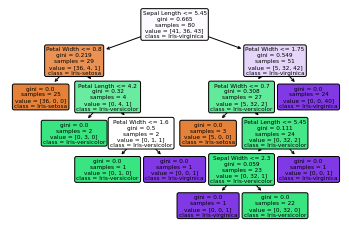

In [ ]:
data = iris

X=data[["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]]  # Features
y=data[["Class"]] 
train_labels = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2,random_state=25)
#X_train.shape()
# Random Forests in `scikit-learn` (with N = 100)

rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, Y_train)
target_names = data['Class'].unique()
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0], 
          feature_names=train_labels,
          class_names=target_names, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(Y_test,y_pred_test))

Waveform

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00       331
           2       1.00      1.00      1.00       340

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



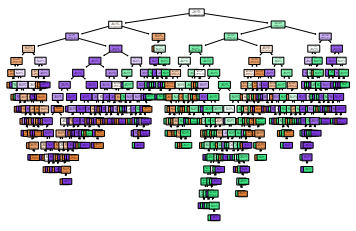

In [ ]:
data = wave
#def plotRandomForrest(data):
    # Arrange Data into Features Matrix and Target Vector

X=data[wave_labels]  # Features
y=data[["class"]] 
train_labels = wave_labels

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2,random_state=25)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, Y_train)
target_names = str(data['class'].unique())
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0], 
          feature_names=train_labels,
          class_names=target_names, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(Y_test,y_pred_test))

Breast Cancer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      precision    recall  f1-score   support

no-recurrence-events       0.72      1.00      0.84        41
   recurrence-events       0.00      0.00      0.00        16

            accuracy                           0.72        57
           macro avg       0.36      0.50      0.42        57
        weighted avg       0.52      0.72      0.60        57



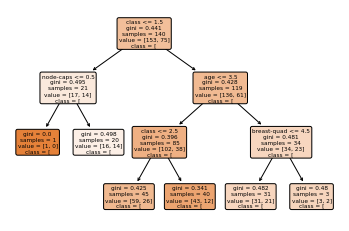

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
pd.options.mode.chained_assignment = None 
data = breastCancer
temp=breastCancer.columns
X=data[["age", "menopause", "tumor-size", "inv-nodes", "node-caps","deg-malig","breast","breast-quad","irradiat"]]  # Features
edit_X = X
ord_enc = OrdinalEncoder()
for i in X: #might want to relook at this later
  edit_X[i] = ord_enc.fit_transform(X)
edit_X.head()
y=data[["class"]] 
train_labels = temp

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(edit_X, y, test_size =0.2,random_state=25)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, Y_train)
target_names = str(data['class'].unique())
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0], 
          feature_names=train_labels,
          class_names=target_names, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(Y_test,y_pred_test))

German

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.70      1.00      0.82       140
           2       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



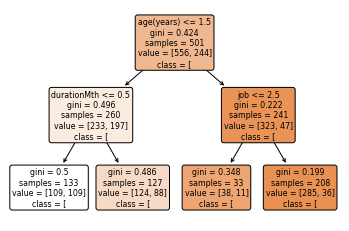

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# pd.options.mode.chained_assignment = None 
data = german
# temp=breastCancer.columns
german_new_columns=german_columns[0:len(german_columns)-1]
X=data[german_new_columns]  # Features
edit_X = X
ord_enc = OrdinalEncoder()
for i in X: #might want to relook at this later
  edit_X[i] = ord_enc.fit_transform(X)
edit_X.head()
y=data[["goodBad"]] 
train_labels = german_new_columns
X.head()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(edit_X, y, test_size =0.2,random_state=25)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, Y_train)
target_names = str(data['goodBad'].unique())
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0], 
          feature_names=train_labels,
          class_names=target_names, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(Y_test,y_pred_test))

Heart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


              precision    recall  f1-score   support

           1       0.74      0.85      0.79        27
           2       0.83      0.70      0.76        27

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



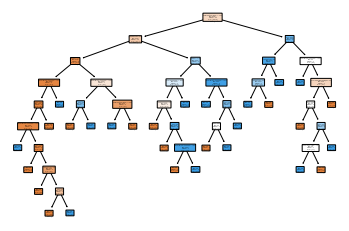

In [ ]:
data = heart

X=data[heart_columns]  # Features
# edit_X = X
# ord_enc = OrdinalEncoder()
# for i in X: #might want to relook at this later
#   edit_X[i] = ord_enc.fit_transform(X)
# edit_X.head()
y=data[["class"]] 
train_labels = heart_columns
X.head()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2,random_state=25)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=25)
rf.fit(X_train, Y_train)
target_names = str(data['class'].unique())
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0], 
          feature_names=train_labels,
          class_names=target_names, 
          filled=True, impurity=True, 
          rounded=True)
y_pred_test = rf.predict(X_test)
print(classification_report(Y_test,y_pred_test))

#General without the best rules

Iris

Wave

In [ ]:
from pyarc import CBA, TransactionDB
import pandas as pd

data_train = pd.read_csv("wave.csv")
data_test = pd.read_csv("wave.csv")

txns_train = TransactionDB.from_DataFrame(data_train)
txns_test = TransactionDB.from_DataFrame(data_test)


cba = CBA(support=0.01, confidence=0.5, algorithm="m2")
cba.fit(txns_train)

accuracy = cba.rule_model_accuracy(txns_test)
print(accuracy)

ValueError: ignored

In [ ]:
###
# from pyarc import CBA
from pyarc.data_structures import TransactionDB
from pyarc.qcba.data_structures import QuantitativeDataFrame
import pandas as pd
from pyarc.qcba import QCBA

In [ ]:
from pyarc.qcba.data_structures import (
    IntervalReader,
    Interval,
    QuantitativeDataFrame,
    QuantitativeCAR
)

In [ ]:
interval_reader = IntervalReader()

interval_reader.closed_bracket = "", "NULL"
interval_reader.open_bracket = "NULL", ""
interval_reader.infinity_symbol = "inf", "inf"
interval_reader.members_separator = "_to_"

interval_reader.compile_reader()

QuantitativeCAR.interval_reader = interval_reader

In [ ]:
data_train_discretized = pd.read_csv("Iris.csv")
data_train_undiscretized = pd.read_csv("Iris.csv")
data_test = pd.read_csv("Iris.csv")

txns_train = TransactionDB.from_DataFrame(data_train_discretized)
txns_test = TransactionDB.from_DataFrame(data_test)

In [ ]:
from pyarc import CBA
from pyarc.data_structures import TransactionDB
from pyarc.qcba.data_structures import QuantitativeDataFrame
import pandas as pd
from pyarc.qcba import QCBA

In [ ]:
!pip install pyarc

     |████████████████████████████████| 357 kB 6.1 MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=537787 sha256=9c8c0dfb9b42cdaa13caa9de1d3b7f71700576b736e0cf32667b19e3439b9e64
  Stored in directory: /root/.cache/pip/wheels/08/9f/26/09cb4efd027e46f96e0a0f33d0a74be614d3caf89c1eeb75a8
Successfully built pyfim


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import pyarc
#import pyarc.utils.plotting as utils

from pyarc import TransactionDB
from pyarc.algorithms import generateCARs
from pyarc.qcba.data_structures import *

In [ ]:
movies_train_undiscr = pd.read_csv("drive/MyDrive/CZ4032DAM/movies.csv", sep=";", index_col=0)
movies_train_discr = pd.read_csv("drive/MyDrive/CZ4032DAM/movies_discr.csv", sep=";", index_col=0)

movies_undiscr_txns = movies_train_undiscr.reset_index()
movies_discr_txns = TransactionDB.from_DataFrame(movies_train_discr)

In [ ]:
movies_train_discr.head()

,estimated-budget,a-list-celebrities,class
0,<150;200),<0;2),box-office-bomb
1,<50;100),<0;2),box-office-bomb
2,<50;100),<0;2),box-office-bomb
3,<50;100),<2;4),box-office-bomb
4,<200;250),<0;2),box-office-bomb


In [ ]:
rm = CBA(algorithm="m2", confidence=0.2, support=0.02).fit(movies_discr_txns)

rules = rm.clf.rules

ds = movies_train_undiscr.reset_index()
quant_dataset = QuantitativeDataFrame(ds)
Y = ds["class"]
quant_dataset.dataframe.head()

,estimated-budget,a-list-celebrities,class
0,160,1,box-office-bomb
1,55,2,box-office-bomb
2,78,1,box-office-bomb
3,66,3,box-office-bomb
4,223,2,box-office-bomb


In [ ]:
!pip install Orange

     |████████████████████████████████| 15.0 MB 187 kB/s 
     |████████████████████████████████| 15.0 MB 174 kB/s 
     |████████████████████████████████| 15.6 MB 97 kB/s 
     |████████████████████████████████| 14.5 MB 181 kB/s 
     |████████████████████████████████| 15.7 MB 54 kB/s 
     |████████████████████████████████| 14.4 MB 180 kB/s 
     |████████████████████████████████| 12.6 MB 69 kB/s 
     |████████████████████████████████| 12.7 MB 46 kB/s 
     |████████████████████████████████| 13.3 MB 208 kB/s 
     |████████████████████████████████| 20.4 MB 8.2 MB/s 
ERROR: Could not find a version that satisfies the requirement Orange (from versions: 2.0.0b0, 2.0.1b0, 2.5a1, 2.5a2, 2.5a4, 2.6, 2.7, 2.7.1, 2.7.2, 2.7.3, 2.7.5, 2.7.7, 2.7.8)
ERROR: No matching distribution found for Orange


In [ ]:
import Orange
iris = Orange.data.Table("iris.tab")
disc_iris = Orange.data.discretization.DiscretizeTable(iris,
    method=Orange.feature.discretization.EqualFreq(n=3))

print("Original data set:")
for e in iris[:3]:
    print(e)

print("Discretized data set:")
for e in disc_iris[:3]:
    print (e)

ModuleNotFoundError: ignored

Automatically created module for IPython interactive environment


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


ValueError: ignored

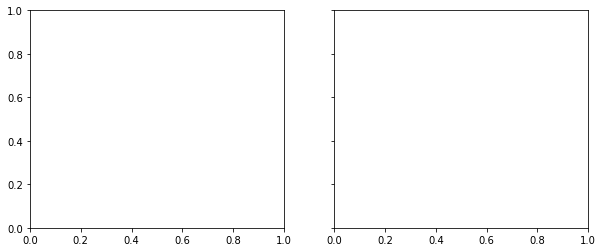

In [38]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor

print(__doc__)

# construct the dataset
# rnd = np.random.RandomState(42)
# X = rnd.uniform(-3, 3, size=100)
# y = np.sin(X) + rnd.normal(size=len(X)) / 3
# X = X.reshape(-1, 1)

# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(X)

# predict with original dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='green',
         label="linear regression")
reg = DecisionTreeRegressor(min_samples_split=3, random_state=0).fit(X, y)
ax1.plot(line, reg.predict(line), linewidth=2, color='red',
         label="decision tree")
ax1.plot(X[:, 0], y, 'o', c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")

# predict with transformed dataset
line_binned = enc.transform(line)
reg = LinearRegression().fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='green',
         linestyle='-', label='linear regression')
reg = DecisionTreeRegressor(min_samples_split=3,
                            random_state=0).fit(X_binned, y)
ax2.plot(line, reg.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")

plt.tight_layout()
plt.show()

In [33]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:

X=df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]  # Features
y=df[["Species"]] 

In [35]:
#encoding y
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Species'] = labelencoder.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
